# Testing DenseNet201

Berikut langkah-langkah tersebut

In [1]:
import os, sys, glob, datetime, time, pytz

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Defining variables
BAT_SIZE      = 20
DATA_SET_DIR  = '/home/jupyter/clothing-dataset/data/' # clothing dataset 10.000
WIDTH, HEIGHT = 128, 128
TEST_DIR      = DATA_SET_DIR + 'test'
MODEL         = 'DenseNet201.model'

timezone = pytz.timezone("Asia/Jakarta")
now = timezone.localize(datetime.datetime.now())

## 1. Image augmentation untuk data testing

Di bawah ini adalah langkah pertama yang dilakukan.

Using TensorFlow backend.


Found 2500 images belonging to 10 classes.
Testing Sample


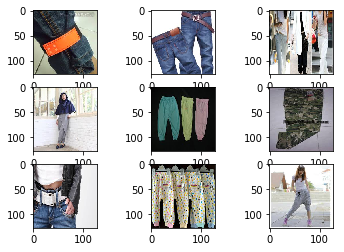

In [3]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(WIDTH, HEIGHT),
    batch_size=BAT_SIZE,
    shuffle=False
)

print('Testing Sample')
x,y = test_generator.next()
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    image = x[i]
    plt.imshow(image)

plt.show()

## 2. Testing model

Langkah berikutnya adalah testing menggunakan dataset testing.

Berikut adalah langkahnya

In [4]:
# Testing
from keras.models import load_model
from keras.utils.generic_utils import CustomObjectScope
from keras.metrics import top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

print('Loading saved model')
with CustomObjectScope({'top_3_accuracy': top_3_accuracy}):
    model = load_model(MODEL)

print('Testing...')
testing_start_datetime = timezone.localize(datetime.datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
testing_start = time.time()
Y_pred = model.predict_generator(
    test_generator, 
    steps=test_generator.samples // BAT_SIZE,
    verbose=1
)
testing_end = time.time()
testing_end_datetime = timezone.localize(datetime.datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
print('Testing from %s to %s taking %d seconds.' % (testing_start_datetime, testing_end_datetime, (testing_end - testing_start)))

W0725 01:12:36.899640 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 01:12:36.986443 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 01:12:37.007018 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 01:12:37.007593 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0725 01:12:37.010020 139915487

Loading saved model


W0725 01:12:38.533982 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0725 01:12:38.604241 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0725 01:12:39.837210 139915487639296 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0725 01:12:56.308967 139915487639296 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updati

Testing...
125/125 [==============================] - 13s 106ms/step
Testing from 2019-07-25 01:13:12 to 2019-07-25 01:13:26 taking 13 seconds.


## Langkah tambahan: Tampilkan accuracy, loss, confusion matrix serta classification report

Langkah ini dilakukan untuk menampilkan kurva accuracy dan loss dari training yang telah dilakukan. Serta confusion matrix untuk testing. Selain itu detail laporan terkait precision, f-score dan recall juga ditampilkan di sini.

Berikut adalah langkahnya

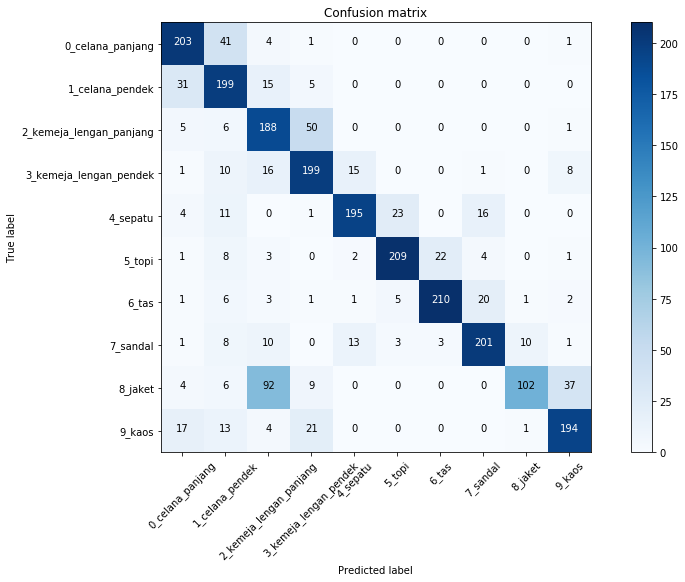

Classification Report
                         precision    recall  f1-score   support

       0_celana_panjang       0.76      0.81      0.78       250
        1_celana_pendek       0.65      0.80      0.71       250
2_kemeja_lengan_panjang       0.56      0.75      0.64       250
 3_kemeja_lengan_pendek       0.69      0.80      0.74       250
               4_sepatu       0.86      0.78      0.82       250
                 5_topi       0.87      0.84      0.85       250
                  6_tas       0.89      0.84      0.87       250
               7_sandal       0.83      0.80      0.82       250
                8_jaket       0.89      0.41      0.56       250
                 9_kaos       0.79      0.78      0.78       250

               accuracy                           0.76      2500
              macro avg       0.78      0.76      0.76      2500
           weighted avg       0.78      0.76      0.76      2500



In [5]:
# %matplotlib inline

# import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
classes = sorted(os.listdir(TEST_DIR))
plt.figure(figsize=(12,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('Classification Report')
classification_report = classification_report(test_generator.classes, y_pred, target_names=classes)
print(classification_report)